# Audio and Spectrograms
This tutorial demonstrates the use of OpenSoundscape's two basic classes: Audio and Spectrogram. These classes allow you to load in, modify, and create spectrograms from audio files.

To download the tutorial as a Jupyter Notebook, click the "Edit on GitHub" button at the top right of the tutorial. You will have to [install OpenSoundscape](installation.html#installation) to use the tutorial.

First, load the classes from OpenSoundscape. These are stored in separate modules.

In [1]:
# import Audio and Spectrogram classes from OpenSoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

## Quickstart
The following code loads an audio file, creates a 224px x 224px -sized spectrogram from it, then creates and saves an image of the spectrogram to the desired path. Each step is discussed in depth below.

In [2]:
original_audio_file = '../tests/1min.wav'
image_shape = (224,224)
spectrogram_save_path = './saved_spectrogram.png'
Spectrogram.from_audio(Audio.from_file(original_audio_file)).to_image(shape=image_shape).save(spectrogram_save_path)

## Audio loading

Load audio files using OpenSoundscape's `Audio` class. 

OpenSoundscape uses a package called `librosa` to help load audio files. Librosa automatically supports `.wav` files, but to use `.mp3` files requires that librosa be installed with a package like `ffmpeg`. See [Librosa's installation tips](https://github.com/librosa/librosa#Hints-for-the-installation) for more information.

An example audio file is stored in the `../tests/` directory of OpenSoundscape. Load that file:

In [3]:
audio_path = '../tests/1min.wav'
audio_object = Audio.from_file(audio_path)

### Audio properties

The properties of an `Audio` object include its samples (the actual audio data) and the sample rate (the number of audio samples taken per second, required to understand the samples). After an audio file has been loaded, these can be accessed using the `samples` and `sample_rate` properties, respectively.

In [4]:
audio_object.samples

array([-0.00888062, -0.00344849,  0.00378418, ..., -0.00048828,
        0.00253296,  0.00109863], dtype=float32)

In [5]:
audio_object.sample_rate

32000

## Audio tools

The `Audio` class gives access to a variety of tools to change audio files or get information about them. As examples, below we demonstrate bandpassing, getting the duration and extending the length of the recording, and trimming the recording. For a description of the entire `Audio` object API, see the [API documentation](api.html#module-opensoundscape.audio)

First up, bandpass the audio file to limit its frequency range to 1000 Hz to 5000 Hz. Modifications like bandpassing return a new object; no modification is made to the original object (`audio_object`) or to the original audio file itself (stored in `audio_path`).

In [6]:
bandpassed = audio_object.bandpass(low_f = 1000, high_f = 5000)

Next, let's create an audio object extended to be twice as long as the original object. First, get the current duration of the audio in `audio_object`.

In [7]:
length = audio_object.duration()
print(length)

60.0


Then create an audio object extended to be twice as long as the original.

In [8]:
extended = audio_object.extend(length * 2)
print(extended.duration())

120.0


Trim the extended recording to its original length again.

In [9]:
trimmed = extended.trim(start_time = 0, end_time = 60.0)

The below logic shows that the samples of the original audio object are equal to the samples of the extended-then-trimmed audio object.

In [10]:
trimmed.samples == audio_object.samples

array([ True,  True,  True, ...,  True,  True,  True])

## Spectrogram creation

An Audio object can be created from a spectrogram using the `Spectrogram.from_audio()` method.

In [11]:
audio_path = '../tests/1min.wav'
audio_object = Audio.from_file(audio_path)
spectrogram_object = Spectrogram.from_audio(audio_object)

A `Spectrogram` object can be plotted using its `plot()` method.

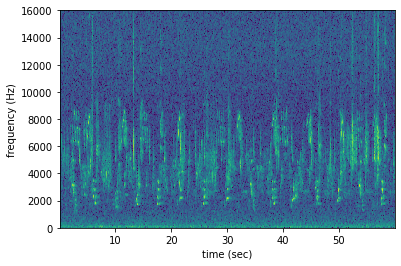

In [12]:
spectrogram_object.plot()

The `from_audio` method converts whatever audio is inside the audio object into a spectrogram. So, modified `Audio` objects can be turned into spectrograms as well. For example, the code below demonstrates creating a spectrogram from a 5 second long trim of the audio object.

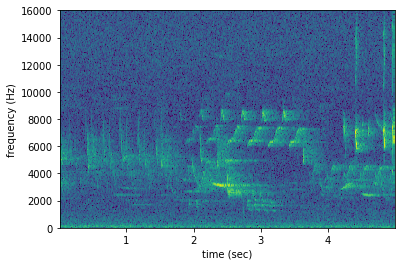

In [13]:
# Trim the original audio
trimmed = audio_object.trim(0, 5)

# Create a spectrogram from the trimmed audio
spec = Spectrogram.from_audio(trimmed)

# Plot the spectrogram
spec.plot()

### Spectrogram properties

To check the scale of a spectrogram, you can look at its `times` and `frequencies` properties. The `times` property is the list of times represented by each column of the spectrogram. The `frequencies` property is the list of frequencies represented by each row of the spectrogram. These are not the actual values of the spectrogram -- just the scale of the spectrogram itself.

In [14]:
spec = Spectrogram.from_audio(Audio.from_file('../tests/1min.wav'))
print(f'the first few times: {spec.times[0:5]}')
print(f'the first few frequencies: {spec.frequencies[0:5]}')

the first few times: [0.008 0.016 0.024 0.032 0.04 ]
the first few frequencies: [  0.   62.5 125.  187.5 250. ]


## Saving a spectrogram

To save the created spectrogram, first convert it to an image. It will no longer be an OpenSoundscape `Spectrogram` object, but instead a Python Image Library (PIL) `Image` object.

In [15]:
print("Type of `spectrogram_audio`, before conversion:", type(spectrogram_object))
spectrogram_image = spectrogram_object.to_image()
print("Type of `spectrogram_image`, after conversion:", type(spectrogram_image))

Type of `spectrogram_audio`, before conversion: <class 'opensoundscape.spectrogram.Spectrogram'>
Type of `spectrogram_image`, after conversion: <class 'PIL.Image.Image'>


Save the PIL Image using its `save()` method, supplying the filename at which you want to save the image.

In [16]:
image_path = './saved_spectrogram.png'
spectrogram_image.save(image_path)

To save the spectrogram at a desired size, specify the image shape when converting the `Spectrogram` to a PIL `Image`.

In [17]:
image_shape = (512,512)
image_path = './saved_spectrogram_large.png'
spectrogram_image = spectrogram_object.to_image(shape=image_shape)
spectrogram_image.save(image_path)

## Custom spectrogram parameters

Use custom parameters to create a spectrogram with high time-resolution. Also trim the spectrogram in frequency and time.

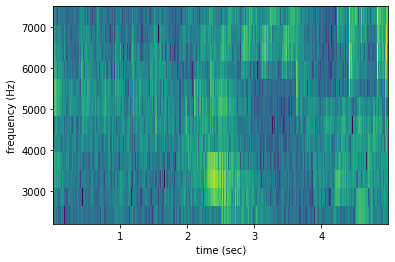

In [18]:
#load audio with 44.1 kHz sampling rate 
audio = Audio.from_file('../tests/1min.wav',sample_rate=44100)

#create a spectrogram with 100-sample windows (100/44100 seconds of audio per window) and no overlap
spec = Spectrogram.from_audio(audio,window_samples=100,overlap_samples=0)

#trim the spectrogram in time and frequency
spec = spec.trim(0,5)
spec = spec.bandpass(2000,8000)
spec.plot()

## Calculating amplitude signal

OpenSoundscape can calculate the amplitude of an audio file over time using the `Spectrogram` class. First, make a spectrogram from 5 seconds' worth of audio.

In [19]:
spec = Spectrogram.from_audio(Audio.from_file('../tests/1min.wav').trim(0,5))

Next, use the `amplitude()` method to get the amplitude signal.

In [20]:
high_freq_amplitude = spec.amplitude()

To visualize the signal, we can plot it over time.

Text(0, 0.5, 'amplitude')

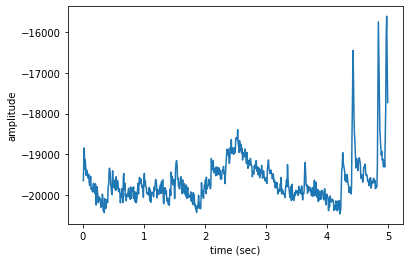

In [21]:
from matplotlib import pyplot as plt
plt.plot(spec.times,high_freq_amplitude)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')

We can also get the amplitude signal from a restricted range of frequencies, e.g., to look at the amplitude in the frequency range of a species of interest. The following code gets the amplitude signal from 8000 Hz to 10000 Hz.

Text(0, 0.5, 'amplitude')

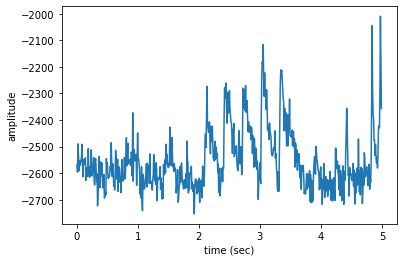

In [22]:
# Get amplitude signal
high_freq_amplitude = spec.amplitude(freq_range=[8000,10000])

# Plot signal
plt.plot(spec.times,high_freq_amplitude)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')